In [256]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

# Reading Data


In [257]:
df_2021 = pd.read_csv('data/2021.csv')
df_2021.dropna(inplace=True)
df_2021.tail(20)

,Plot,Treatment,BD 0-10cm,BD 10-20cm,BD 20-30cm,BD Moisture 0-10cm,BD Moisture 10-20 cm,BD Moisture 20-30 cm,Emergence,Chlorophyll 28th May,...,Cone P NT 25cm,Cone P NT 27.5cm,Cone P NT 30cm,Cone P NT 32.5cm,Cone P NT 35cm,Cone P NT 37.5cm,Cone P NT 40cm,Cone P NT 42.5cm,Cone P NT 45cm,Combine Yield (t/ac)
39,40,PLPHMNCLA,1.19,1.26,1.51,19.2,30.1,29.2,9.6,39.2,...,1096.0,1914.0,2693.0,1776.0,3561.0,4448.0,4110.0,3889.0,3453.0,2.94
40,41,PHPLMCCLA,1.28,1.43,1.39,18.7,29.3,31.9,9.2,42.9,...,1885.0,1951.0,1913.0,1745.0,2084.0,2278.0,3579.0,3627.0,1978.0,2.96
41,42,PLPLMNCHA,1.12,1.26,1.43,17.8,30.5,29.4,9.2,41.3,...,1016.0,1163.0,1365.0,1417.0,2071.0,3708.0,4054.0,4196.0,3808.0,2.69
43,44,PLPLMNCLA,1.13,1.28,1.30,19.2,34.4,33.0,9.2,39.2,...,1925.0,2533.0,2976.0,3230.0,2908.0,3917.0,4514.0,3991.0,4055.0,2.53
45,46,PHPLMNCLA,1.18,1.43,1.65,19.4,28.6,30.8,9.2,43.3,...,552.0,560.0,835.0,1336.0,2076.0,1632.0,3019.0,1392.0,2006.0,2.36
57,58,MLPHMNCLA,1.18,1.61,1.67,15.4,25.4,22.4,7.6,40.1,...,4883.0,4475.0,3962.0,2360.0,4142.0,4349.0,2499.0,1392.0,3207.0,2.13
59,60,MHPHMNCLA,1.22,1.66,1.62,16.7,20.4,21.1,6.4,39.1,...,2755.0,2246.0,3376.0,4152.0,4604.0,4166.0,4571.0,4299.0,4446.0,2.02
64,65,PLPHMCCLA,1.25,1.29,1.47,15.3,18.6,22.3,6.2,38.4,...,1903.0,1780.0,109.0,2840.0,3010.0,3714.0,3814.0,4045.0,3495.0,1.77
65,66,PLPLMCCHA,1.25,1.58,1.70,13.6,25.3,18.4,7.8,39.3,...,2020.0,2109.0,2411.0,2664.0,2902.0,3670.0,3551.0,4039.0,3056.0,1.96
66,67,PLPHMNCHA,1.36,1.40,1.64,17.3,21.7,19.6,7.2,43.6,...,1122.0,1270.0,1805.0,2322.0,3023.0,4384.0,4652.0,4544.0,4360.0,2.29


### Setting up data for models & testing

In [258]:
# Setting targets and removing them from dataframe
y = df_2021['Combine Yield (t/ac)']
del df_2021['Combine Yield (t/ac)']

emergenceY = df_2021['Emergence']
del df_2021['Emergence']

# Unused cols
del df_2021['Plot']
del df_2021['Treatment']

# Features
X = df_2021

In [259]:
# Splitting data for training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_emergence, X_test_emergence, y_train_emergence, y_test_emergence = train_test_split(X, emergenceY, test_size=0.33, random_state=42) # Emergence

## Linear Regression Model

In [260]:
# Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y) # score

-1.5004491790764072

In [261]:
# Linear Regression Model
reg = LinearRegression().fit(X_train_emergence, y_train_emergence)
reg.score(X, emergenceY) # score

-2.50914174614577

In [262]:
# evaluate the model
yhat = reg.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 5.516


In [263]:
# reg.predict(np.array([[17.7, 31.9, 29.4]]))

## SVR Model

In [264]:
# SVR Model
svr = SVR().fit(X_train, y_train)
svr.score(X, y) # score

0.2548963195170362

In [265]:
# SVR Model
svr = SVR().fit(X_train_emergence, y_train_emergence)
svr.score(X, emergenceY) # score

0.04248918316947625

In [266]:
# svr.predict(np.array([[17.7, 31.9, 29.4]]))

In [267]:
# Starting point -> improved models
# target = emergence date / emergence count

# Feature Selection

/Users/ciaranflanagan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ciaranflanagan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ciaranflanagan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/ciaranflanagan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/ciaranflanagan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 205, in accuracy_score
    y_type, y_true, y_pred = _check_t

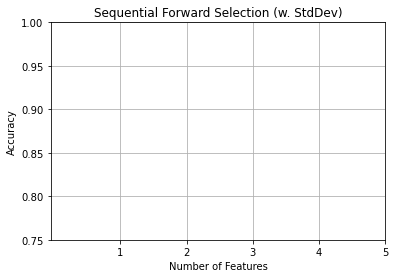

('BD 0-10cm', 'BD 10-20cm', 'BD 20-30cm', 'BD Moisture 0-10cm', 'BD Moisture 10-20 cm')


In [268]:
X = df_2021

sfs_forward = SFS(reg, k_features=5, forward=True, floating=False, scoring='accuracy', cv=5)

# Try the sfs_forward model on the 
sfs_forward = sfs_forward.fit(X, y, custom_feature_names=X.columns)

fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

In [269]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=12)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.303927
Feature 1: 0.532768
Feature 2: 1.287597
Feature 3: 0.000412
Feature 4: 0.203775
Feature 5: 0.744881
Feature 6: 2.465215
Feature 7: 4.668294
Feature 8: 3.438737
Feature 9: 6.880368
Feature 10: 6.585583
Feature 11: 1.897739
Feature 12: 1.508275
Feature 13: 0.060816
Feature 14: 0.016039
Feature 15: 2.405919
Feature 16: 2.156557
Feature 17: 1.518389
Feature 18: 1.409752
Feature 19: 0.071443
Feature 20: 3.914890
Feature 21: 0.218445
Feature 22: 1.121615
Feature 23: 0.076112
Feature 24: 0.813220
Feature 25: 5.333652
Feature 26: 3.170982
Feature 27: 0.033472
Feature 28: 1.319670
Feature 29: 0.387981
Feature 30: 0.064817
Feature 31: 0.069785
Feature 32: 0.038904
Feature 33: 0.018334
Feature 34: 0.016959
Feature 35: 0.136846
Feature 36: 0.000892
Feature 37: 0.024253
Feature 38: 0.411830
Feature 39: 0.052144
Feature 40: 0.002210
Feature 41: 0.243828
Feature 42: 0.030702
Feature 43: 0.628552
Feature 44: 0.323379
Feature 45: 0.090852
Feature 46: 0.353925
Feature 47: 0.705227
Fe

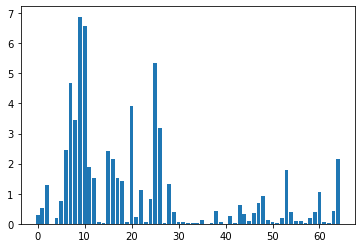

In [270]:
X_train_fs, X_test_fs, fs = select_features(X_train_emergence, y_train_emergence, X_test_emergence)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [271]:
reg.fit(X_train_fs, y_train)
# evaluate the model
yhat = reg.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.403


/Users/ciaranflanagan/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [272]:
len(fs.feature_names_in_)

65

In [273]:
cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]
features_df_new

,Chlorophyll 28th May,Chlorophyll 23rd June,Chlorophyll 12th July,Chlorophyll 5th August,LAI 15th June,LAI 12th July,UW Screenings 2.5,UW Screenings 2.25,NT Screenings 2.25,UW Protein @ 15% Moisture,NT Protein @ 15% Moisture,Cone P NT 45cm
1,38.0,43.9,28.0,28.9,0.63,1.90,96.2,2.5,2.9,11.21,12.16,4156.0
2,45.9,45.5,31.5,17.8,0.84,1.84,92.6,4.6,4.4,12.49,13.03,4489.0
3,44.7,46.3,31.7,39.4,0.78,2.96,93.5,4.9,8.4,12.75,13.67,3935.0
4,36.7,48.3,30.0,38.3,0.66,2.37,94.8,3.7,6.6,12.54,12.81,4455.0
5,41.8,41.7,29.8,31.5,0.84,2.67,93.2,5.5,2.8,11.44,11.47,4473.0
6,41.2,40.9,29.7,27.1,0.72,1.89,93.0,5.5,3.8,11.35,11.48,4662.0
7,38.8,45.7,30.8,31.0,0.46,1.19,94.8,3.8,3.5,13.15,12.12,4153.0
9,47.1,47.0,34.7,34.7,0.52,1.04,96.7,2.4,2.6,10.46,10.93,3982.0
10,45.1,44.5,33.5,27.5,0.58,1.19,98.9,1.0,1.1,11.26,10.08,3869.0
11,41.8,38.5,30.8,35.2,0.58,1.73,97.2,1.8,0.2,10.83,10.12,4574.0
